In [1]:
from my_snn.rsnn import RSNN, RSNN_2l, RSNN_2l_ALIF
from my_snn.rsnn_delays import RSNN_d_d, RSNN_d_i, RSNN_d_all
from my_snn.tonic_dataloader import DatasetLoader
from my_snn.custom_dataloader import AddTaskDatasetLoader, MultTaskDatasetLoader
from my_snn.utils import train, training_plots, ModelLoader
import torch
from torch.utils.data import DataLoader
import matplotlib.pyplot as  plt
import numpy as np

device = "cuda:0"
ckpt_dir = 'addsum_tests'

## Adding Task (50 frames and 500 frames)

In [2]:
time_window = 50
batch_size = 128 # 128: anil kag
#d_train = AddTaskDatasetLoader(time_window, batch_size)
d_train = AddTaskDatasetLoader(time_window, batch_size, randomness=True)
d_test = AddTaskDatasetLoader(time_window, batch_size, randomness=True) # 2560 from schmiduber paper
train_loader = DataLoader(d_train, batch_size=batch_size, num_workers=0)
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)

snn_d50_fs = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
snn_rnn50_fs = ModelLoader('add2_50_rnn_128_fs', ckpt_dir, batch_size, device)
snn_d50_32_fs = ModelLoader('add2_50_d_32_fs', ckpt_dir, batch_size, device)
snn_d50_8_fs = ModelLoader('add2_50_d_8_fs', ckpt_dir, batch_size, device)
snn_d50_2_fs = ModelLoader('add2_50_d_2_fs', ckpt_dir, batch_size, device)

C:\Users\saucedo\anaconda3\envs\deeplearnig\lib\site-packages\torch\serialization.py:658: SourceChangeWarning: source code of class 'my_snn.rsnn_delays.RSNN_d_d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0]
instance of <class 'my_snn.rsnn_delays.RSNN_d_i'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_i'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_i'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 

In [3]:
snn_d500_fs = ModelLoader('add2_500_d_128_fs', ckpt_dir, batch_size, device)
snn_rnn500_fs = ModelLoader('add2_500_rnn_128_fs', ckpt_dir, batch_size, device)

delays: [0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400, 410, 420, 430, 440, 450, 460, 470, 480, 490]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully


## plot without moving average

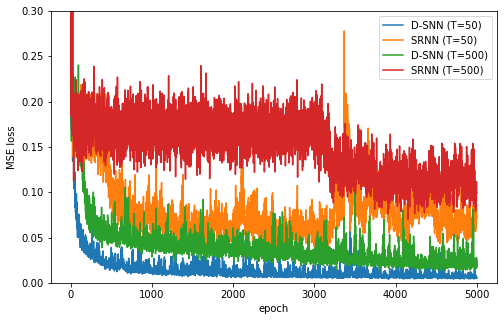

In [4]:
plt.figure(figsize=(8,5))
ax = snn_d50_fs.plot_per_epoch(snn_d50_fs.train_loss, label='D-SNN (T=50)')
snn_d50_fs.plot_per_epoch(snn_rnn50_fs.train_loss, label='SRNN (T=50)')
ax.set_ylabel('MSE loss')

# plt.figure(figsize=(10,5))
snn_d500_fs.plot_per_epoch(snn_d500_fs.train_loss, label='D-SNN (T=500)')
snn_d500_fs.plot_per_epoch(snn_rnn500_fs.train_loss, label='SRNN (T=500)')
#ax.set_ylim(0,0.3)
                          
              
ax.set_ylim(0,0.3)

plt.savefig('fig1.pdf', dpi=200)

In [5]:
def moving_average(x, w):
    return np.convolve(x, np.ones(w), 'valid') / w

rsnn500 = np.array(snn_rnn500_fs.train_loss)[:,1]
rsnn50 = np.array(snn_rnn50_fs.train_loss)[:,1]
dsnn500 = np.array(snn_d500_fs.train_loss)[:,1]
dsnn50 = np.array(snn_d50_fs.train_loss)[:,1]

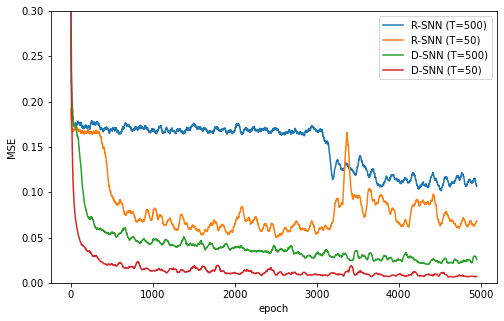

In [8]:
plt.figure(figsize=(8,5))
plt.plot(moving_average(rsnn500, 50), label='R-SNN (T=500)')
plt.plot(moving_average(rsnn50, 50), label='R-SNN (T=50)')
plt.plot(moving_average(dsnn500, 50), label='D-SNN (T=500)')
plt.plot(moving_average(dsnn50, 50), label='D-SNN (T=50)')
plt.ylim(0,0.3)
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.legend()
plt.savefig('dsnn_rsnn_ma.pdf', dpi=200)

Important: Remove reset after spike for add task

Test set accuracy (rnn): 32.8125%
Test set accuracy (delays): 79.6875%


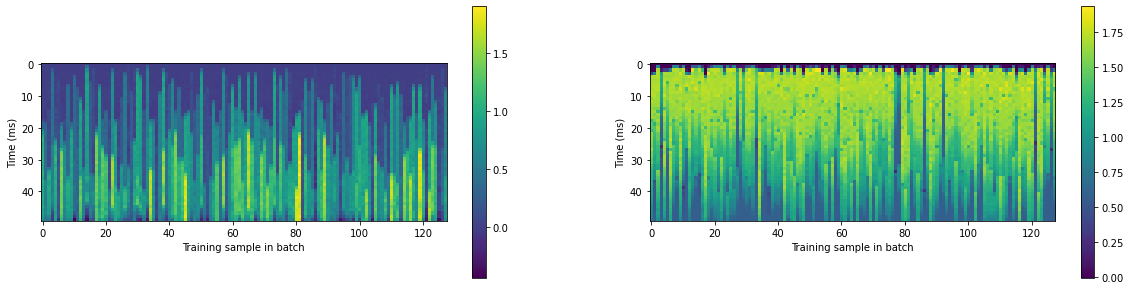

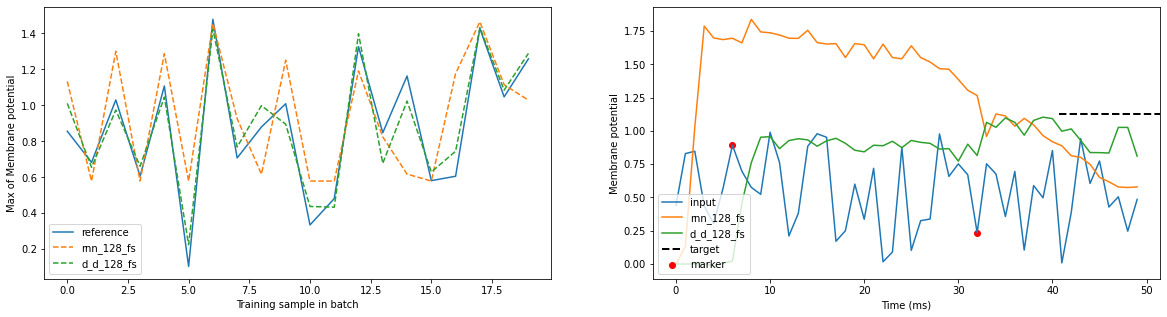

In [11]:
n = np.random.randint(batch_size)
d_test = AddTask2DatasetLoader(50, 128, randomness=True) # 2560 from schmiduber paper
test_loader = DataLoader(d_test, batch_size=batch_size, num_workers=0)

snn_d50_fs.loss_fn = 'prediction2'
snn_rnn50_fs.loss_fn = 'prediction2'
for images, labels in test_loader:
    pred_r, ref_r = snn_rnn50_fs.propagate(images.to(device), labels.to(device))
    pred_d, ref_d = snn_d50_fs.propagate(images.to(device), labels.to(device))

correct_r = torch.sum(abs(pred_r-ref_r) < 0.1)
correct_d = torch.sum(abs(pred_d-ref_d) < 0.1)
print(f'Test set accuracy (rnn): {100*correct_r.item()/len(images)}%')
print(f'Test set accuracy (delays): {100*correct_d.item()/len(images)}%')

cmap = 'RdBu'

fig, (ax1, ax2) = plt.subplots(figsize=(20, 5), ncols=2)
im1 = ax1.imshow(snn_d50_fs.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im1, ax = ax1)
ax1.set_ylabel('Time (ms)')
ax1.set_xlabel('Training sample in batch')
im2 = ax2.imshow(snn_rnn50_fs.mem_state['output'][:,:,0].detach().cpu().numpy())
fig.colorbar(im2, ax = ax2)
ax2.set_ylabel('Time (ms)')
ax2.set_xlabel('Training sample in batch')

plt.figure(figsize=(20,5))
plt.subplot(121)
plt.plot(ref_r[:20].detach().cpu().numpy(), label='reference')
plt.plot(pred_r[:20].detach().cpu().numpy(), label = 'rnn_128_fs', ls='--')
plt.plot(pred_d[:20].detach().cpu().numpy(), label= 'd_d_128_fs', ls='--')
plt.xlabel('Training sample in batch')
plt.ylabel('Max of Membrane potential')
plt.legend(loc='lower left')

inp = snn_d50_fs.spike_state['input'].detach().cpu().numpy()[:, n ,0]
spk = snn_d50_fs.spike_state['input'].detach().cpu().numpy()[:, n ,1]

plt.subplot(122)
plt.plot(inp, label='input')
plt.plot(snn_rnn50_fs.mem_state['output'].detach().cpu().numpy()[:, n ,:], label = 'rnn_128_fs')
plt.plot(snn_d50_fs.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'd_d_128_fs')
plt.scatter(spk.nonzero(), inp[spk.nonzero()], color='r', label='marker')
plt.axhline(ref_d[n].item(), 0.8, 1.0, color='k', lw=2, ls='--', label='target')
plt.xlabel('Time (ms)')
plt.ylabel('Membrane potential')
plt.legend(loc='lower left')
#plt.show()

plt.savefig('fig2.pdf', dpi=200)

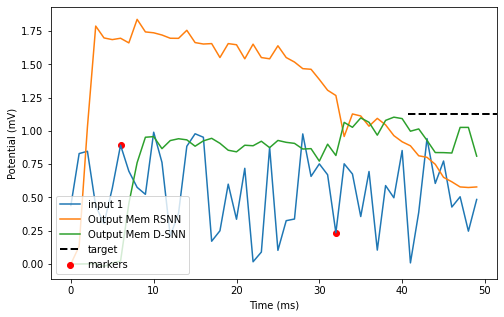

In [14]:
plt.figure(figsize=(8,5))
plt.plot(inp, label='input 1')
plt.scatter(spk.nonzero(), inp[spk.nonzero()], color='r', label='markers')
plt.plot(snn_rnn50_fs.mem_state['output'].detach().cpu().numpy()[:, n ,:], label = 'Output Mem RSNN')
plt.plot(snn_d50_fs.mem_state['output'].detach().cpu().numpy()[:, n ,:], label= 'Output Mem D-SNN')
plt.axhline(ref_d[n].item(), 0.8, 1.0, color='k', lw=2, ls='--', label='target')
plt.xlabel('Time (ms)')
plt.ylabel('Potential (mV)')
plt.legend(loc='lower left')
plt.savefig('fig2.pdf', dpi=200)

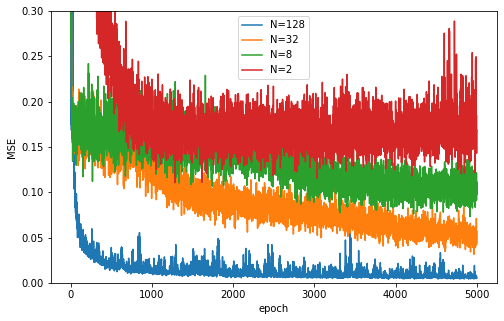

In [19]:
plt.figure(figsize=(8,5))
ax = snn_d50_fs.plot_per_epoch(snn_d50_fs.train_loss, label='N=128')
snn_d50_fs.plot_per_epoch(snn_d50_32_fs.train_loss, label='N=32')
snn_d50_fs.plot_per_epoch(snn_d50_8_fs.train_loss, label='N=8')
snn_d50_fs.plot_per_epoch(snn_d50_2_fs.train_loss, label='N=2')
ax.set_ylabel('MSE')
ax.set_ylim(0,0.3)
plt.savefig('add_sizes.pdf', dpi=200)

delays: [0]
instance of <class 'my_snn.rsnn_delays.RSNN_d_i'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully


C:\Users\saucedo\anaconda3\envs\deeplearnig\lib\site-packages\torch\serialization.py:658: SourceChangeWarning: source code of class 'my_snn.rsnn_delays.RSNN_d_d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


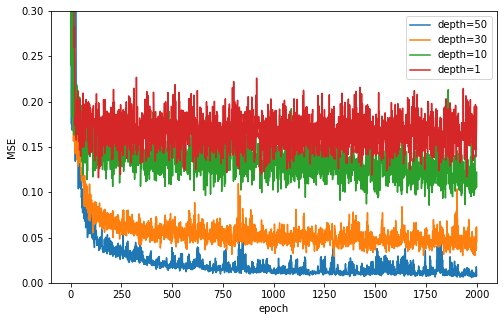

In [6]:
snn_d50_1_1_fs = ModelLoader('add2_50_d_1_1_128_fs', ckpt_dir, batch_size, device)
snn_d50_10_1_fs = ModelLoader('add2_50_d_10_1_128_fs', ckpt_dir, batch_size, device)
snn_d50_30_1_fs = ModelLoader('add2_50_d_30_1_128_fs', ckpt_dir, batch_size, device)

dsnn50_d30 = np.array(snn_d50_30_1_fs.train_loss)[:,1]
dsnn50_d10 = np.array(snn_d50_10_1_fs.train_loss)[:,1]
dsnn50_d1 = np.array(snn_d50_1_1_fs.train_loss)[:,1]

plt.figure(figsize=(8,5))
ax = snn_d50_fs.plot_per_epoch(snn_d50_fs.train_loss[:2000], label='depth=50')
snn_d50_1_1_fs.plot_per_epoch(snn_d50_30_1_fs.train_loss, label='depth=30')
snn_d50_1_1_fs.plot_per_epoch(snn_d50_10_1_fs.train_loss, label='depth=10')
snn_d50_1_1_fs.plot_per_epoch(snn_d50_1_1_fs.train_loss, label='depth=1')
ax.set_ylabel('MSE')
ax.set_ylim(0,0.3)
plt.savefig('add_depths.pdf', dpi=200)

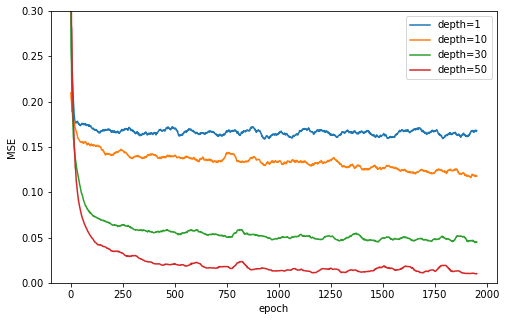

In [9]:
plt.figure(figsize=(8,5))
plt.plot(moving_average(dsnn50_d1, 50), label='depth=1')
plt.plot(moving_average(dsnn50_d10, 50), label='depth=10')
plt.plot(moving_average(dsnn50_d30, 50), label='depth=30')
plt.plot(moving_average(dsnn50[:2000], 50), label='depth=50')
plt.ylim(0,0.3)
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.savefig('dsnn_depth_ma.pdf', dpi=200)
plt.legend()

C:\Users\saucedo\anaconda3\envs\deeplearnig\lib\site-packages\torch\serialization.py:658: SourceChangeWarning: source code of class 'my_snn.rsnn_delays.RSNN_d_d' has changed. you can retrieve the original source code by accessing the object's source attribute or set `torch.nn.Module.dump_patches = True` and use the patch tool to revert the changes.
  warnings.warn(msg, SourceChangeWarning)


delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]
instance of <class 'my_snn.rsnn_delays.RSNN_d_d'> loaded sucessfully
delays: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 4

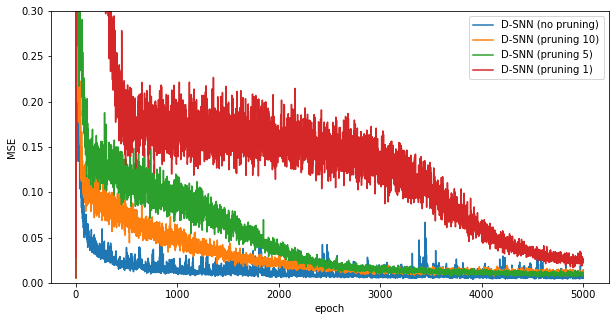

In [10]:
snn_d50 = ModelLoader('add2_50_d_128_fs', ckpt_dir, batch_size, device)
snn_d50_pool_10 = ModelLoader('add2_50_d_128_fs_pool_10', ckpt_dir, batch_size, device)
snn_d50_pool_5 = ModelLoader('add2_50_d_128_fs_pool_5', ckpt_dir, batch_size, device)
snn_d50_pool_1 = ModelLoader('add2_50_d_128_fs_pool_1', ckpt_dir, batch_size, device)

dsnn50_p50 = np.array(snn_d50.train_loss)[:,1]
dsnn50_p10 = np.array(snn_d50_pool_10.train_loss)[:,1]
dsnn50_p5 = np.array(snn_d50_pool_5.train_loss)[:,1]
dsnn50_p1 = np.array(snn_d50_pool_1.train_loss)[:,1]

plt.figure(figsize=(10,5))
ax = snn_d50_pool_10.plot_per_epoch(snn_d50.train_loss, label='D-SNN (no pruning)')
snn_d50_pool_10.plot_per_epoch(snn_d50_pool_10.train_loss, label='D-SNN (pruning 10)')
snn_d50_pool_10.plot_per_epoch(snn_d50_pool_5.train_loss, label='D-SNN (pruning 5)')
snn_d50_pool_10.plot_per_epoch(snn_d50_pool_1.train_loss, label='D-SNN (pruning 1)')
ax.set_ylabel('MSE')
ax.set_ylim(0,0.3)
plt.savefig('add_pruning.pdf', dpi=200)

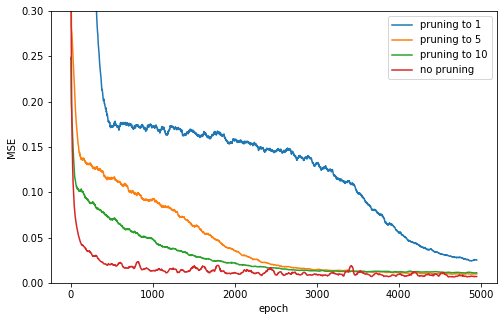

In [11]:
plt.figure(figsize=(8,5))
plt.plot(moving_average(dsnn50_p1, 50), label='pruning to 1')
plt.plot(moving_average(dsnn50_p5, 50), label='pruning to 5')
plt.plot(moving_average(dsnn50_p10, 50), label='pruning to 10')
plt.plot(moving_average(dsnn50_p50, 50), label='no pruning')
plt.ylim(0,0.3)
plt.ylabel('MSE')
plt.xlabel('epoch')
plt.savefig('dsnn_pruning_ma.pdf', dpi=200)
plt.legend()